In [1]:
%load_ext autoreload
%autoreload 2

from ipywidgets import VBox

from caImageAnalysis import BrukerFish, VolumeFish
from caImageAnalysis.mesm import *
from caImageAnalysis.temporal import save_temporal
from caImageAnalysis.visualize import * 

### Change the exp_folder to the path of the experiment

In [2]:
# Change this path to the experiment folder
exp_folder = r'/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104'
region = ''

In [3]:
# Initialize the fish. 
# If custom 2P, use VolumeFish. If Bruker 2P, use BrukerFish.

# fish = VolumeFish(exp_folder)
fish = BrukerFish(exp_folder, region=region)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:166: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 166 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(log)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML pars

{'frametimes': PosixPath('/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000_frametimes.h5'),
 'raw_image': PosixPath('/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000_ch2.tif'),
 'raw': PosixPath('/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000'),
 'mesmerize': PosixPath('/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch'),
 'anatomy': None,
 'references': PosixPath('/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000/References'),
 'voltage_output': PosixPath('/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000/motor_pretectum-000_Cycle00001_VoltageOutput_001.xml'),
 'log': PosixPath('/Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000/motor_pretectum-000.xml'),
 'volumes': {'0': {'image': PosixPath('/Volumes/

## Pick a plane to run component evaluation

In [4]:
mes_df = load_mesmerize(fish)
iw = visualize_mesmerize(mes_df, 'cnmf')
iw.show()

Batch exists. Loading batch.pickle
Decode mmap filename /Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/mesmerize-batch/b1180acd-2d96-4a4e-bccd-c7e4bea9999c/b1180acd-2d96-4a4e-bccd-c7e4bea9999c-image_els__d1_512_d2_512_d3_1_order_F_frames_1174.mmap
Decode mmap filename /Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/mesmerize-batch/b01d1f75-3535-4995-8ac5-3ab78f8b63bf/b01d1f75-3535-4995-8ac5-3ab78f8b63bf-image_els__d1_512_d2_512_d3_1_order_F_frames_1174.mmap
Decode mmap filename /Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/mesmerize-batch/b96097fb-6dae-411c-a3c4-a4cf886dfd69/b96097fb-6dae-411c-a3c4-a4cf886dfd69-image_els__d1_512_d2_512_d3_1_order_F_frames_1174.mmap
Decode mmap filename /Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_eggwater_0mM_14_20230913/mesmerize-batch/72c4fe6f-c512-41b4-b81c-6991e9b6da1f/72c4fe6f-c512-41b4-b81c-6991e9b6da1f-image_els__d1_512_d2_512_d3_1_order_

RFBOutputContext()

In [5]:
iw.plot.canvas.close()

In [8]:
# 1. Pick the row index of the plane you want to analyze
# NOTE: You might need to restart the kernel when running the same image back to back or when you run the iw before this cell
index = 1

In [9]:
# 2a. Using fastplotlib, determine the parameters for component evaluation
mes_df = load_mesmerize(fish)
mes_df = uuid_to_plane(mes_df)
row = mes_df.iloc[index]
vis_plots = visualize_compeval(fish, row)
VBox([
        vis_plots[0].show(),
        vis_plots[1].show(),
        *vis_plots[2:]
    ])

Batch exists. Loading batch.pickle
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap


RFBOutputContext()

RFBOutputContext()

Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap
Decode mmap filename /Volumes/Rapid/DOI/Bruk

In [10]:
# 2b. Wait for the widget to fully load and then run this
interactive_temporal(vis_plots[0], vis_plots[1])

/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/fastplotlib/graphics/features/_base.py:87: UserWarning: Event handler <bound method Interaction.event_handler of 'contours': LineCollection @ 0x28848f280
Collection of <3306> Graphics> is already registered.
  warn(f"Event handler {handler} is already registered.")


In [ ]:
# VAGAL PARAMS
{'rval_lowest': 0.0,
 'SNR_lowest': 1.5,
 'cnn_lowest': 0.2,
 'rval_thr': 0.8,
 'min_SNR': 2.0,
 'min_cnn_thr': 0.9}

# HINDBRAIN PARAMS
{'rval_lowest': 0.0,
 'SNR_lowest': 1.5,
 'cnn_lowest': 0.5,
 'rval_thr': 0.8,
 'min_SNR': 2.0,
 'min_cnn_thr': 0.9}

In [11]:
# 3. After deciding on a set of parameters, save them as params
vis_params =  vis_plots[4:7] + vis_plots[8:]
params = {p.children[0].description: p.children[0].value for p in vis_params}.copy()
save_params(fish, params)

In [12]:
# 4. Load the parameters
params = load_params(fish)
params

{'rval_lowest': 0.0,
 'SNR_lowest': 1.5,
 'cnn_lowest': 0.5,
 'rval_thr': 0.8,
 'min_SNR': 2.0,
 'min_cnn_thr': 0.9}

In [13]:
# 5. Set parameters to image
# Even for the first image that you determined the parameters on, run this cell just to set the parameters
for p in vis_plots:
    if isinstance(p, HBox):
        p.children[0].value = params[p.children[0].description]

In [14]:
# 6. Close the plots after setting the parameters of a plane
vis_plots[0].canvas.close()
vis_plots[1].plot.canvas.close()

#### Repeat steps 1, 2, 5, 6 for each plane of the experiment ^

### Component cleanup

Batch exists. Loading batch.pickle
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap


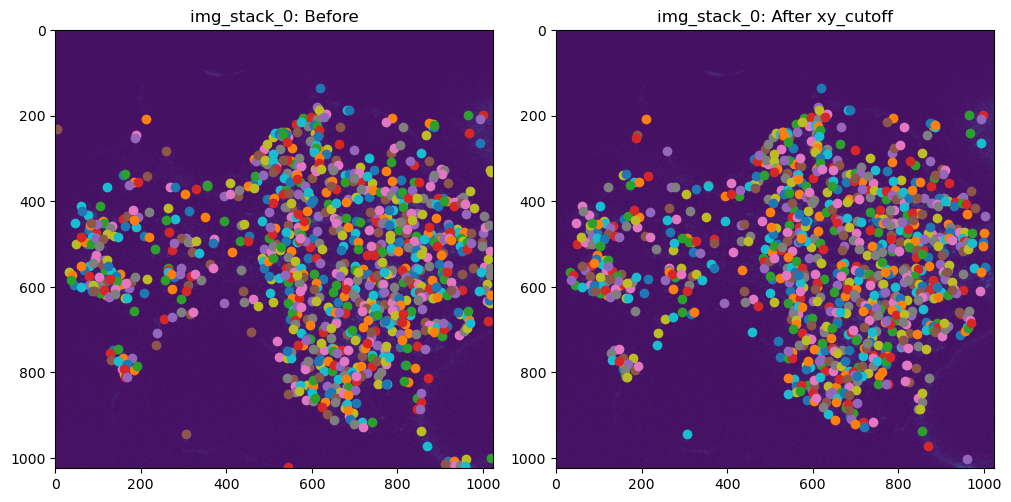

In [4]:
# Remove ROIs at the borders
if 'vagal' in fish.data_paths['raw'].name:
    xy_cutoff = 40  # in pixels; if the ROI is within this many pixels of an image edge, it is discarded

else:
    xy_cutoff = 20  
    
good_rois = remove_xy(fish, xy_cutoff=xy_cutoff)

Batch exists. Loading batch.pickle


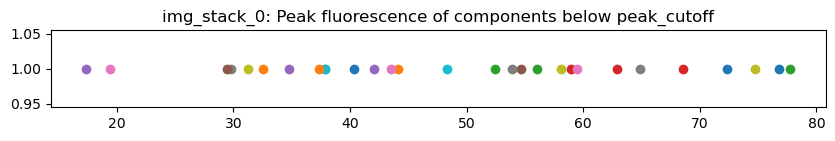

In [23]:
# Look at the distribution of temporal peak values per plane
# Change the peak_cutoff to visualize distributions with lower fluorescence values

plane = 0  # pick a plane where you think there are more ROIs with low fluorescence
peak_cutoff = 80  # maximum peak fluorescence value

name = f'img_stack_{plane}'
mes_df = uuid_to_plane(load_mesmerize(fish))
row = mes_df[(mes_df.algo == 'cnmf') & (mes_df.item_name == name)].iloc[0]
plot_t_distribution(row, good_rois[name], peak_cutoff=peak_cutoff)

Batch exists. Loading batch.pickle
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap


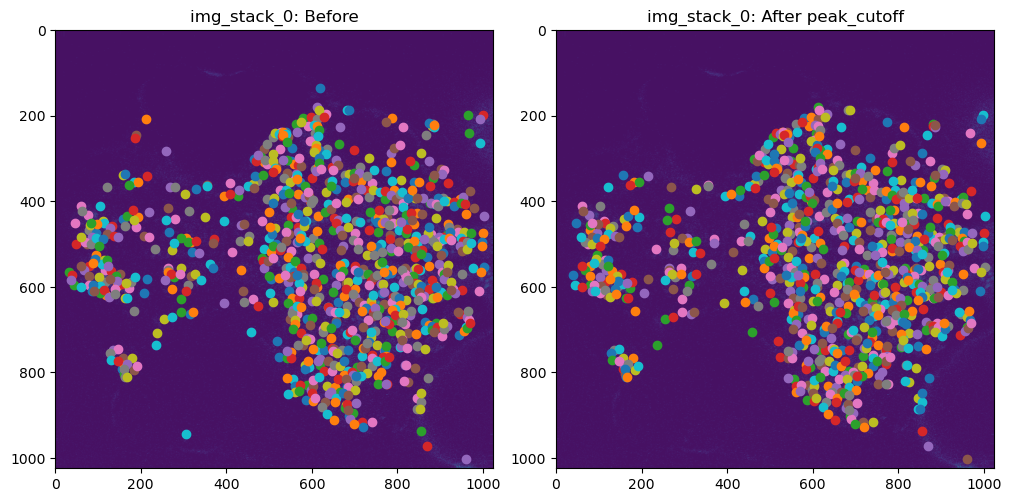

In [5]:
# Remove ROIs with small temporal peak values
if 'vagal' in fish.data_paths['raw'].name:
    peak_cutoff = 80

else:
    peak_cutoff = 40

better_rois = remove_low_t(fish, indices=good_rois, peak_cutoff=peak_cutoff)

Batch exists. Loading batch.pickle
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap


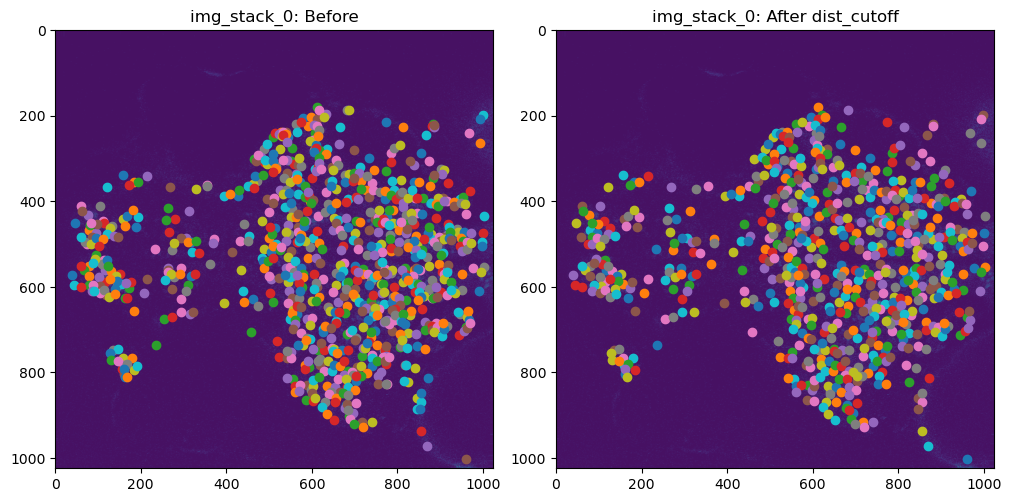

In [6]:
# Remove ROIs with close centers of mass 
# If any two ROIs have a center of mass within the dist_cutoff, the one with the lower peak fluorescence is eliminated
if 'vagal' in fish.data_paths['raw'].name:
    dist_cutoff = 20  # in pixels

else:
    dist_cutoff = 10  # in pixels

best_rois = remove_close_dist(fish, indices=better_rois, dist_cutoff=dist_cutoff)

In [7]:
# Create a dictionary of final ROIs
final_rois = best_rois.copy()

Batch exists. Loading batch.pickle
Decode mmap filename /Volumes/Rapid/DOI/Bruker/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/mesmerize-batch/ca450d2a-f550-4abd-99ba-771d2e4dd7dd/ca450d2a-f550-4abd-99ba-771d2e4dd7dd-image_els__d1_1024_d2_1024_d3_1_order_F_frames_2046.mmap


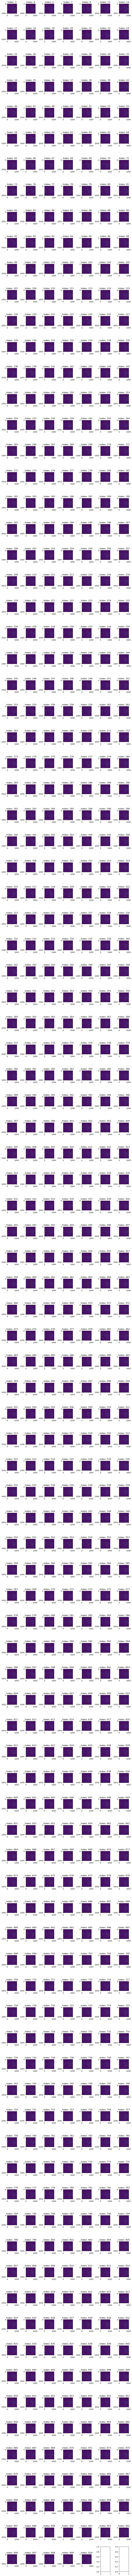

In [10]:
# Remove any additional ROIs manually
# Plot all the ROIs of a single plane to determine the indices of the bad ROIs
# Add indices to the remove_indices list in the cell below
plane = 0

name = f'img_stack_{plane}'
mes_df = load_mesmerize(fish)
mes_df = uuid_to_plane(mes_df)
row = mes_df[(mes_df.algo=='cnmf') & (mes_df.item_name == name)].iloc[0]
plot_single_rois(row, best_rois[name])

In [11]:
remove_indices = [13, 14, 70 , 835, 837, 838, 839, 840, 892, 908, 909, 918]  # list of ROI indices to be removed

for ind in remove_indices:
    final_rois[name] = np.delete(final_rois[name], np.where(final_rois[name] == ind))
final_rois

{'img_stack_0': array([  3,   4,   5,   7,   9,  17,  18,  19,  20,  21,  23,  24,  25,
         26,  27,  28,  29,  30,  33,  34,  35,  36,  37,  38,  39,  43,
         46,  47,  48,  49,  51,  53,  55,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  71,  73,  76,  77,  78,  79,  80,
         81,  82,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  98,  99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111,
        113, 114, 115, 116, 119, 121, 122, 124, 125, 127, 129, 130, 131,
        132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 145, 146, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 159, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 177, 179, 180, 181,
        182, 183, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214,
        216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230,
        233, 234, 235, 236, 237, 238

In [12]:
# Save the final ROIs under mesmerize-batch/final_rois.pickle
save_rois(fish, final_rois)

In [13]:
# Final ROIs
final_rois = load_rois(fish)
final_rois

{'img_stack_0': array([  3,   4,   5,   7,   9,  17,  18,  19,  20,  21,  23,  24,  25,
         26,  27,  28,  29,  30,  33,  34,  35,  36,  37,  38,  39,  43,
         46,  47,  48,  49,  51,  53,  55,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  71,  73,  76,  77,  78,  79,  80,
         81,  82,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  98,  99, 100, 101, 102, 103, 104, 105, 107, 109, 110, 111,
        113, 114, 115, 116, 119, 121, 122, 124, 125, 127, 129, 130, 131,
        132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 145, 146, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 159, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 177, 179, 180, 181,
        182, 183, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214,
        216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230,
        233, 234, 235, 236, 237, 238